In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)

file = np.load('Features/i3d-features/RGBTest/Fast.Furious.6.2013__#01-03-25_01-04-59_label_B1-0-0__2.npy')
print(file.shape)
file2 = np.load('Features/vggish-features/test/Fast.Furious.6.2013__#01-03-25_01-04-59_label_B1-0-0__vggish.npy')
print(file2.shape)

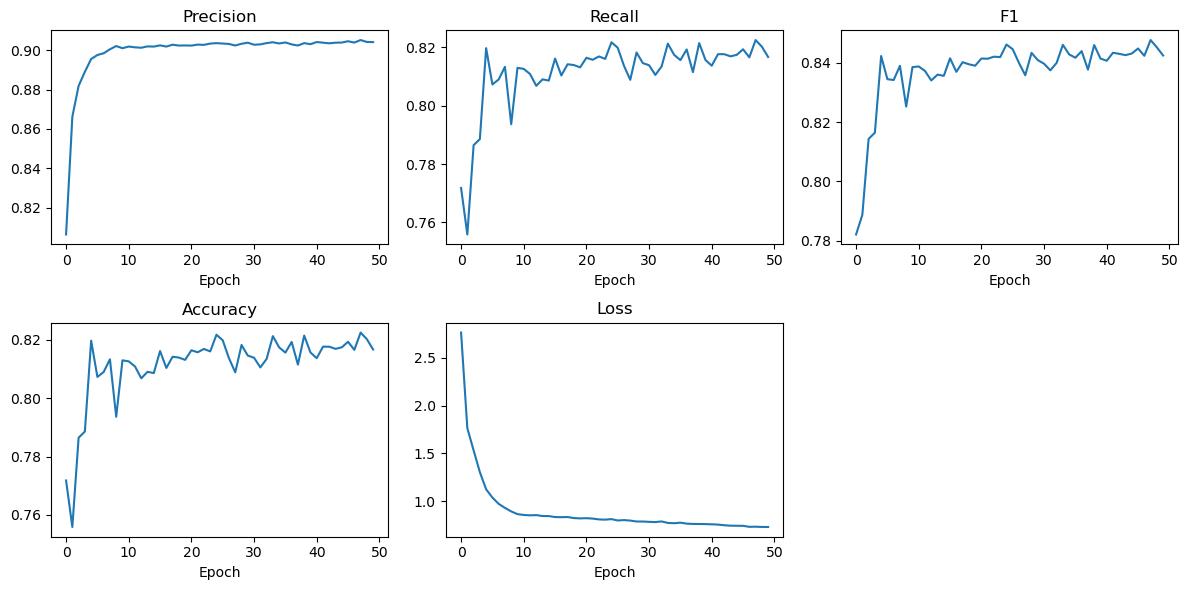

In [1]:
from matplotlib import pyplot as plt
import numpy as np

precision = np.load('ckpt/precision.npy')
recall = np.load('ckpt/recall.npy')
roc_auc = np.load('ckpt/roc_auc.npy')
f1 = np.load('ckpt/f1.npy')
accuracy = np.load('ckpt/accuracy.npy')
# print(f'Accuracy: {accuracy} \n F1: {f1} \n Precision: {precision} \n Recall: {recall} \n ROC AUC: {roc_auc} \n')

loss = np.load('ckpt/train_losses.npy')
# plt.plot(loss)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# Plot data on each subplot 
axes[0, 0].plot(precision)
axes[0, 0].set_title('Precision') 
axes[0, 0].set_xlabel('Epoch')
axes[0, 1].plot(recall)
axes[0, 1].set_title('Recall')
axes[0, 1].set_xlabel('Epoch')
axes[0, 2].plot(f1)
axes[0, 2].set_title('F1')
axes[0, 2].set_xlabel('Epoch')
axes[1, 0].plot(accuracy)
axes[1, 0].set_title('Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 1].plot(loss)
axes[1, 1].set_title('Loss')
axes[1, 1].set_xlabel('Epoch')
axes[1, 2].set_visible(False)

# Optional: Adjust spacing between subplots
fig.tight_layout()

plt.show()

In [6]:
import numpy as np
import os
import cv2

cap = cv2.VideoCapture(os.path.join('Features\Videos','Fast.Furious.6.2013__#01-03-25_01-04-59_label_B1-0-0.mp4'))
lens = int(cap.get(7))
print(lens)

2256


In [14]:
import numpy as np
import pandas as pd
import torch

labels = np.load('ckpt/all_data_labels.npy')
torch_labels = torch.tensor(labels, dtype=torch.int64) 

# Calculate class frequencies
class_counts = torch.bincount(torch_labels)
print(class_counts)

# Calculate inverse class frequencies
class_weights = 1.0 / class_counts
print(class_weights)

# Normalize weights
class_weights /= class_weights.sum()
print(class_weights)

# Calculate sample weights based on class imbalance
sample_weights = class_weights[torch_labels]
print(sample_weights)


tensor([10255,  2220,  1680,  1565,  1905,   180,  1965])
tensor([9.7513e-05, 4.5045e-04, 5.9524e-04, 6.3898e-04, 5.2493e-04, 5.5556e-03,
        5.0891e-04])
tensor([0.0116, 0.0538, 0.0711, 0.0763, 0.0627, 0.6636, 0.0608])
torch.Size([19770])
